<a href="https://colab.research.google.com/github/VictorProphetaE/Pos-graduacao/blob/main/Sazo_gordura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_excel(next(iter(uploaded.keys())),sheet_name= 1)
df.head()

Saving Dados sazo.xlsx to Dados sazo.xlsx


,Meses,Média gordura mensal
0,2019-01-01,109.682213
1,2019-02-01,98.812491
2,2019-03-01,108.502682
3,2019-04-01,106.888142
4,2019-05-01,106.926034


In [ ]:
df.set_index('Meses',inplace=True)
df.head()

,Média gordura mensal
Meses,
2019-01-01,109.682213
2019-02-01,98.812491
2019-03-01,108.502682
2019-04-01,106.888142
2019-05-01,106.926034


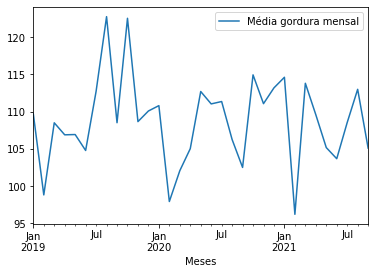

In [ ]:
df.plot()

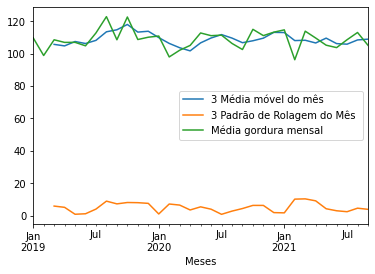

In [ ]:
timeseries = df['Média gordura mensal']
timeseries.rolling(3).mean().plot(label='3 Média móvel do mês ')
timeseries.rolling(3).std().plot(label='3 Padrão de Rolagem do Mês ')
timeseries.plot()
plt.legend()

<Figure size 432x288 with 0 Axes>

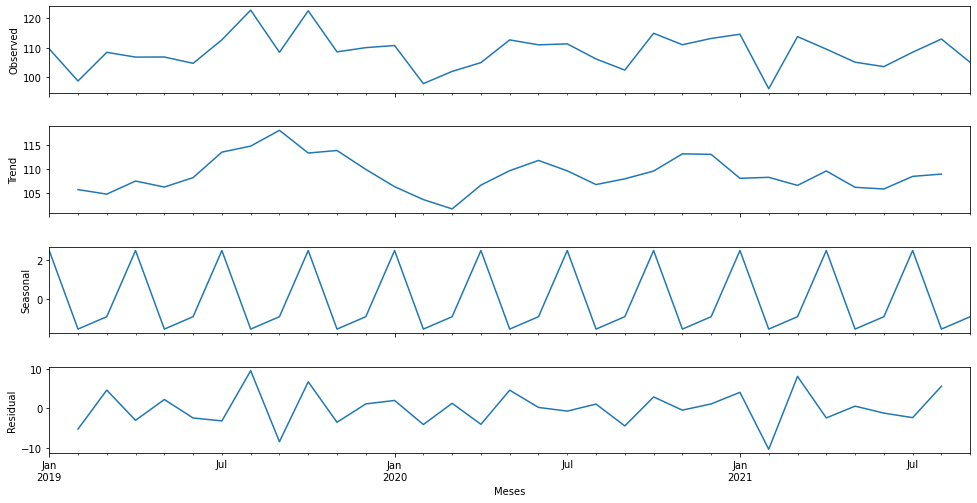

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Média gordura mensal'], freq=3)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

In [ ]:
from statsmodels.tsa.stattools import adfuller
test_result = adfuller(df['Média gordura mensal'])
print ('ADF Teste:')
labels = ['ADF Estatística','valor p','Nº de atrasos usados','Número de observações usados']

for value,label in zip(test_result,labels):
    print(label+':'+str(value))
if test_result[1] <= 0.15:
    print("Rejeitar hipótese nula e os dados são estacionários")
else:
    print("Falha ao rejeitar H0, portanto, os dados não são estacionários")

ADF Teste:
ADF Estatística:-5.432526836312645
valor p:2.8931710730873144e-06
Nº de atrasos usados:0
Número de observações usados:32
Rejeitar hipótese nula e os dados são estacionários


In [ ]:
def check_adf(time_series):
    test_result = adfuller(time_series)
    print ('ADF Teste:')
    labels = ['ADF Estatística','valor p','Nº de atrasos usados','Número de observações usados']
    for value,label in zip(test_result,labels):
        print(label+':'+str(value))
    if test_result [1] <= 0.15:
        print ("Rejeitar hipótese nula e os dados são estacionários")
    else:
        print ("Falha ao rejeitar H0, portanto, os dados não são estacionários")

In [ ]:
df ['Primeira gordura Diferença'] = df['Média gordura mensal'] - df['Média gordura mensal'].shift(1)
check_adf(df['Primeira gordura Diferença'].dropna())

ADF Teste:
ADF Estatística:-6.164092018208643
valor p:7.058495646099145e-08
Nº de atrasos usados:1
Número de observações usados:30
Rejeitar hipótese nula e os dados são estacionários


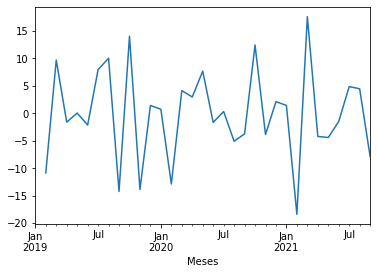

In [ ]:
df['Primeira gordura Diferença'].plot()

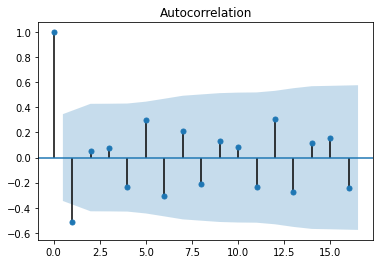

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig_first = plot_acf(df["Primeira gordura Diferença"].dropna())